# Markov Models of Natural Language

I know you can generate text with deep learning, but I wanted to try a **Markov language model**, which I learned about in one of my classes. I made 2 functions for a m-th order Markov model, one generates text based on the frequencies of **m-letter** substrings and the other generates text by looking at the frequencies of **m-word** substrings.

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#importing Ariana Grande songs
df=pd.read_csv("pop_singers_csv/ArianaGrande.csv")
df

,Artist,Title,Album,Date,Lyric,Year
0,Ariana Grande,"​thank u, next","thank u, next",2018-11-03,thought i'd end up with sean but he wasn't a m...,2018
1,Ariana Grande,7 rings,"thank u, next",2019-01-18,yeah breakfast at tiffany's and bottles of bub...,2019
2,Ariana Grande,​God is a woman,Sweetener,2018-07-13,you you love it how i move you you love it how...,2018
3,Ariana Grande,Side To Side,Dangerous Woman,2016-05-20,ariana grande nicki minaj i've been here all ...,2016
4,Ariana Grande,​​no tears left to cry,Sweetener,2018-04-20,right now i'm in a state of mind i wanna be in...,2018
...,...,...,...,...,...,...
303,Ariana Grande,God is a Woman (Excuse me i love you LIVE),NaN,2020-12-21,you you love it how i move you love it how i t...,2020
304,Ariana Grande,Magic*,NaN,None,come back soon when there is lyrics,None
305,Ariana Grande,Right here,NaN,None,lalalalalalala oooooh lets do what we want th...,None
306,Ariana Grande,Venuss*,NaN,None,no lyrics for this song come back soon,None


In [3]:
#cleaning df and getting lyrics
albums=['thank u, next', 'Sweetener', 'Dangerous Woman', 'Positions', 'My Everything', 'Yours Truly', 'Christmas Kisses EP',
'Christmas & Chill']
df=df[df["Album"].isin(albums)]
df=df[~df["Title"].str.contains("Spanglish")]
df.groupby("Album").count()

,Artist,Title,Date,Lyric,Year
Album,,,,,
Christmas & Chill,6,6,6,6,6
Christmas Kisses EP,5,5,5,5,5
Dangerous Woman,18,18,18,18,18
My Everything,14,14,14,14,14
Positions,12,12,12,12,12
Sweetener,15,15,15,15,15
Yours Truly,10,10,10,10,10
"thank u, next",12,12,12,12,12


In [4]:
#removing unnecesary words and spaces, making one string of all lyrics
text=df["Lyric"].str.cat()
text=text.replace('ariana grande',' ')
text=text.replace('  ',' ')
text=text.replace('  ',' ')
text

"thought i'd end up with sean but he wasn't a match wrote some songs about ricky now i listen and laugh even almost got married and for pete i'm so thankful wish i could say thank you to malcolm 'cause he was an angel pre one taught me love one taught me patience and one taught me pain now i'm so amazing say i've loved and i've lost but that's not what i see so look what i got look what you taught me and for that i say thank you next next thank you next next thank you next i'm so fuckin' grateful for my ex thank you next next thank you next next thank you next next i'm so fuckin' spend more time with my friends i ain't worried 'bout nothin' plus i met someone else we havin' better discussions i know they say i move on too fast but this one gon' last 'cause her name is ari and i'm so good with that so good with that pre she taught me love love she taught me patience patience how she handles pain pain that shit's amazing yeah she's amazing i've loved and i've lost yeah yeah but that's no

In [5]:
def markov_text_words(learn_text, m=1, length=100, seed="My favorite is the"):
    """
    Generate fake text according to an m-th order Markov model. 
    Args:
        text: the string from which to learn substrings, preferably long
        m: positive int. the order of the Markov model, which means substrings are of m-words. 
        length: positive int. the number of synthetic characters to generate. should have a default value. 
        seed: str. the beginning of the fake text should have a default value.
    Returns:
        The output string fake_text. fake_text starts with the seed. 
        length of fake_text = length of seed + argument 'length'
    """
    D={}
    learn_text=learn_text.replace('/[\d]/',' ')
    learn_text=learn_text.replace('\n',' ')
    learn_text=learn_text.replace('  ',' ')
    split=learn_text.split(" ")
    #make a dictionary of substrings with frequencies
    for i in range(len(split)): #for every entry in the list
        if i+m <= len(split):
            if " ".join(split[i:i+m+1]) not in D: #if it's in the dictionary, then it means it's the first time this appears in the list
                D[" ".join(split[i:i+m+1])]=1
            else:
                D[" ".join(split[i:i+m+1])]+=1
    fake_text=seed #start fake_text with the seed
    while len(fake_text)-len(seed)<length: #keep generating letters until fake_text reaches length, but don't include seed length
        curr=(" ").join(fake_text.split(" ")[-m:]) #get the most recent n letters from the fake_text
        matches=[] #initialize the list for matching n+1-grams
        weights=[]
        for key, val in D.items(): #iterate through the n+1-grams
            if (" ".join(key.split(" ")[:m]))==curr: #if the most recent n letters from the fake_text and the first n letters from an n+1-gram match
                matches.append(key) #add the n+1-gram to the lists, along with its frequency
                weights.append(val)
        if not matches:
            raise ValueError("Seed was bad, try a different one.")
        choice=random.choices(matches, weights) #randomly choose a matching n+1-gram taking into account its frequency
        choice=choice[0].split(" ")[m]
        fake_text+= " " +choice #take the last letter of the match and add it to the fake_text   
    return (fake_text)

In [6]:
def frequency_viz(viz_text, n=0):
    D=[]
    split=viz_text.split(" ")
    for i in range(len(split)): #for every entry in the list
        if i+n <= len(split):
            D.append(" ".join(split[i:i+n+1]))
    D=np.array(D)
    unique, counts = np.unique(D, return_counts=True)
    indexes=counts.argsort()[::-1]
    sort=unique[indexes]
    fig,ax=plt.subplots(1,figsize=(20,5))
    ax.bar(sort[:20], sorted(counts, reverse=True)[:20])
    plt.xticks(rotation=45)

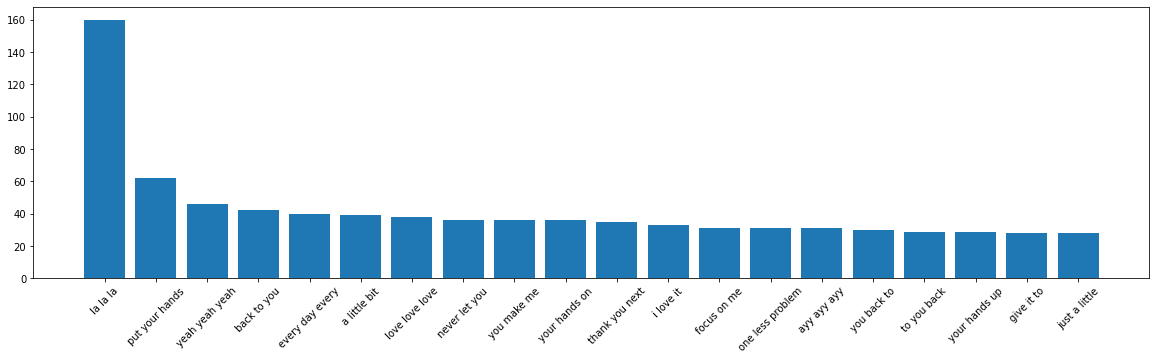

In [7]:
#most frequent words or phrases in the text in which the generated text is based on
frequency_viz(text, n=2)

In [8]:
fake1=markov_text_words(text, 2, 800, "i end up with")
fake1

"i end up with calls and not strings write my own tonight even though i'm wifey you can give anyone i know they hate but i knew you were so good in your smile it's in your head wondering where this thing could go down if we get back to you i might lеt it down the chimney tonightwelcome to this step step on up to this crazy love oh yeah yeah yeah said maybe that's the game that you gonna be happy happy yeah gonna be alright we're gonna be post six thirty six thirty yeah what you doin' tonight better say doin' you right here with me it's a surprise surprise boy are you down are you down mmm you know that i'm a giver it's only nature i live for danger pre all that im like ooh ooh ooh ain't nobody keep on talking that's right you could hold moonlight in your orbit and you know i know it's hard to find out that"

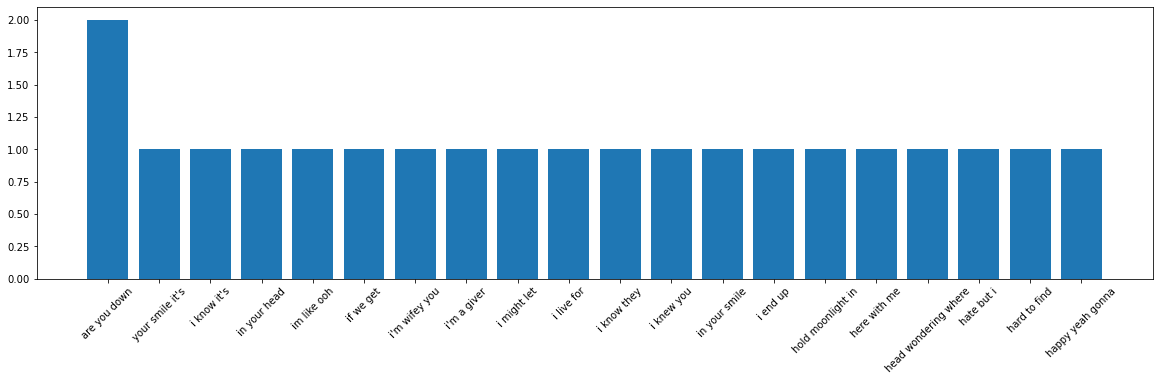

In [9]:
frequency_viz(fake1, n=2)

In [10]:
fake2=markov_text_words(text, 2, 800, "i end up with")
fake2

"i end up with your girlfriend yeah yeah yeah yeah yeah yeah like a dangerous woman somethin' 'bout you 'bout you i'm in the same old lane goin' the wrong way pre but if you got everything but i really care is you wake up oh yeah we turnin' up we turnin' up we turnin' up we turnin' up hmm yeah 'cause i'm bored post with your girlfriend with your girlfriend girlfriend girlfriend baby girlfriend with your girlfriend with your girlfriend girlfriend girlfriend girlfriend with your body and it's unsweet rerespect bad gyal when mi done speak now now now that i've had had to keep speaking my love infinite nothin i wouldnt do that make me make bad boy you make me feel like a model god doing what you want it a thousand so that i'm over it selfdestruct show up now if all fell through would you do i'd love to see my"

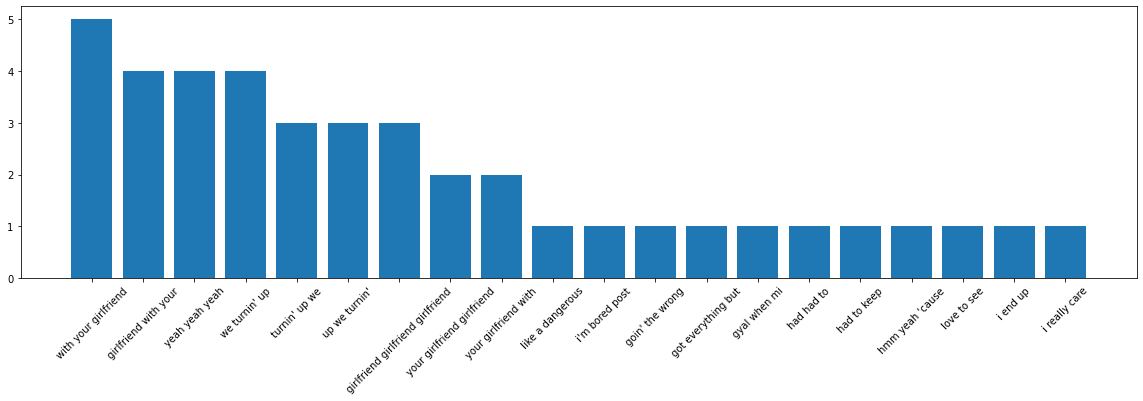

In [17]:
frequency_viz(fake2, 2)

In [14]:
fake3=markov_text_words(text, 3, 800, "So i wanna be")
fake3

"So i wanna be in your life like that in your life like that i'll bring the light right back i'll bring the life right back pre i'm gonna make you want more more i'm gonna be your new favorite tell 'em you closing the door i am the only for sure baby oh babe yeah hold up there shouldn't be no hold up there's more love if you follow emotions emotions show up now if you're down to roll up meet me on the west side for me hold up there shouldn't be no hold up hold up there's more love if you follow emotions emotions show up now if you're down to roll up roll up meet me on the west side for me hold up there shouldn't be no hold up there's more love if you follow emotions emotions show up now if you're down to roll up meet me i don't want to deny it that is why we talking about it baby yeah we talking about it"

## 

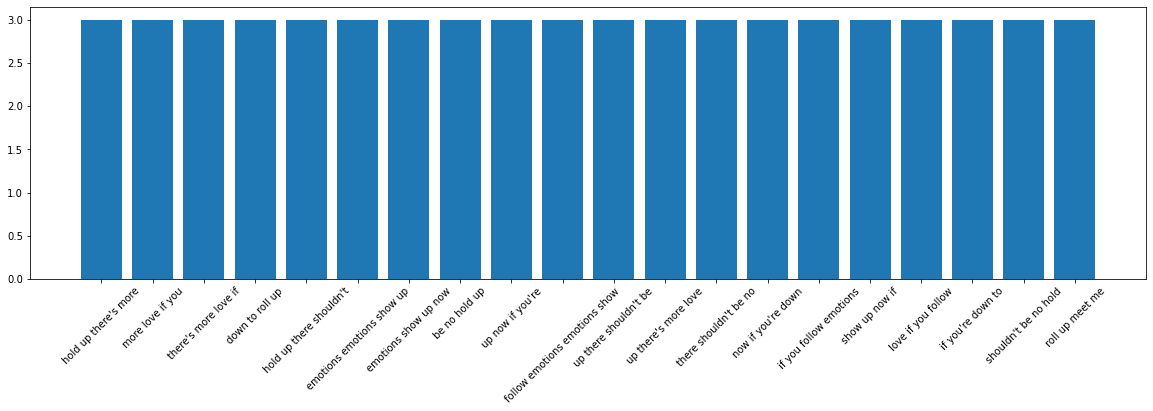

In [16]:
frequency_viz(fake3, 3)

In [37]:
def markov_text_letters(learn_text, m=1, length=100, seed="My favorite is the"):
    """
    Generate fake text according to an m-th order Markov model. 
    Args:
        text: the string from which to learn substrings, preferably long
        m: positive int. the order of the Markov model, which means substrings are of m-letters. 
        length: positive int. the number of synthetic characters to generate. should have a default value. 
        seed: str. the beginning of the fake text should have a default value.
    Returns:
        The output string fake_text. fake_text starts with the seed. 
        length of fake_text = length of seed + argument 'length'
    """
    D={}
    learn_text=learn_text.replace('\n',' ')
    learn_text=learn_text.replace('  ',' ')
    learn_text=learn_text.replace('  ',' ')
    learn_text=learn_text.replace('  ',' ')
    split=text
    #make a dictionary of substrings with frequencies
    for i in range(len(split)): #for every entry in the list
        if i+m <= len(split):
            if (split[i:i+m+1]) not in D: #if it's in the dictionary, then it means it's the first time this appears in the list
                D[split[i:i+m+1]]=1
            else:
                D[split[i:i+m+1]]+=1
    fake_text=seed #start fake_text with the seed
    while len(fake_text)-len(seed)<length: #keep generating letters until fake_text reaches length, but don't include seed length
        curr=fake_text[len(fake_text)-m:len(fake_text)] #get the most recent n letters from the fake_text
        matches=[] #initialize the list for matching n+1-grams
        weights=[]
        for key, val in D.items(): #iterate through the n+1-grams
            if key[:m]==curr: #if the most recent n letters from the fake_text and the first n letters from an n+1-gram match
                matches.append(key) #add the n+1-gram to the lists, along with its frequency
                weights.append(val)      
        if not matches:
            raise ValueError("Seed was bad, try a different one.")
        choice=random.choices(matches, weights) #randomly choose a matching n+1-gram taking into account its frequency
        choice=choice[0][m]
        fake_text += choice #take the last letter of the match and add it to the fake_text  
    return (fake_text)

In [39]:
fake4=markov_text_letters(text, 2, 800, "i end up with")
fake4

"i end up witheack oh mest foright und at's know to next your on' che abe pute oh all 't 'tin't you smid i whyou go my yead donst mes he me do i drazy a diesta puty baby all annins donsavor tole one you're're much you cly ext a me plikee fore ing they doin' like whownsidere savereve day thend to whoh comettou i skinkin tryi'm way ay forgive we hen i caus ookinsay thist kneed rayy the be wit i donverget i'm so i'm tooke i aby th ought to get got buting babou fee yea my be you sing so plarchimpare nown you'reahem gothing weart ifocus hooese it gin you thin't babou dad ah it got you're let ah st you want shirl th is oh i've me seres go custur you but timer ar wascou thin't up ally for herythe my le yould nothe tolet the all you baby don the oven ma nee that's lay whe pre mast yourt na lacloody that gasto m"

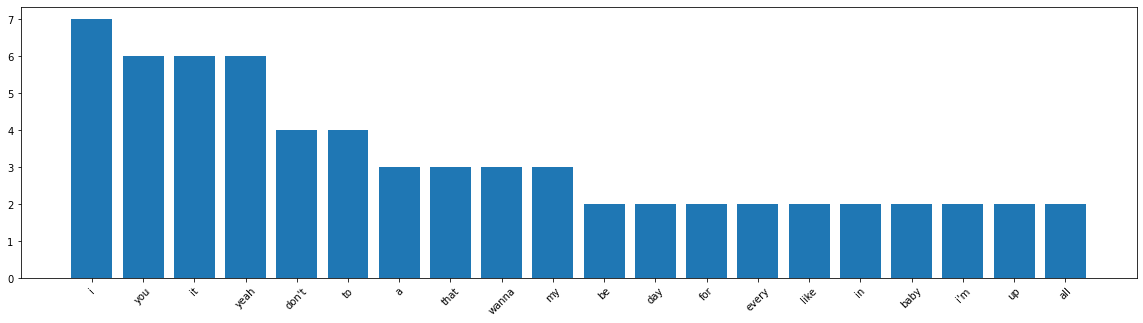

In [46]:
frequency_viz(fake4, 0)

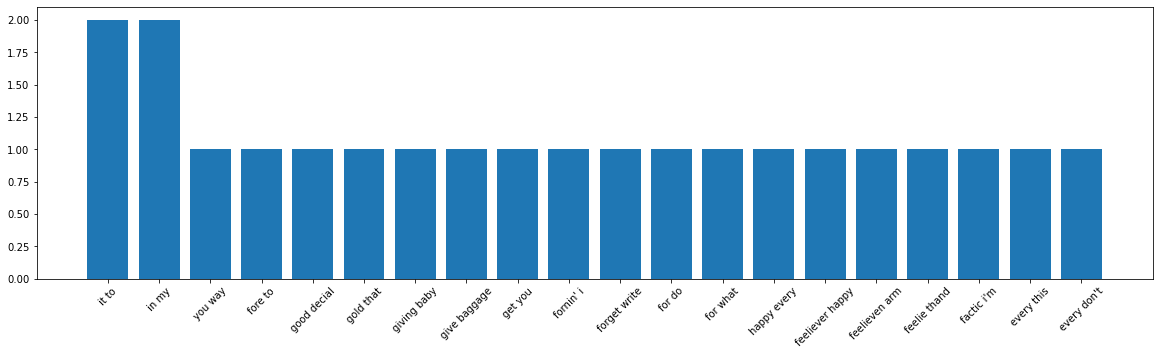

In [47]:
frequency_viz(fake4, 1)

In [41]:
fake5=markov_text_letters(text, 3, 800, "i end up with")
fake5

"i end up with my hard i'll light you let man inside your has aricated you it's of you back baby say ooh won't do been you got me know i make up me all for me be ther of mise placing or myself of you true nothe got me it's get veryone to be sweets you just wanter boy you been thround it it you everload doing bad think in my ty never come all you're you them the him feel with though like if my try days boy you'll okay ther body else stop breal i to ah focused you doo can breall i to better let's me for where's got love lords up put you arough my show i fall me all yeah any i see matchest town my put but i cale get away going fall night how how you'd right snow i down don't no ove light that might no that and inste all can't nobody you back in there rect skrrt is fucking think your hey speak about yoursel"

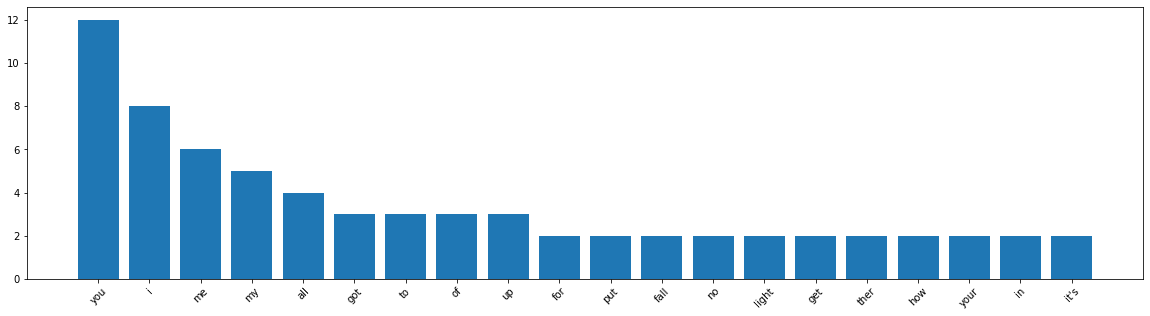

In [55]:
frequency_viz(fake5, 0)

In [42]:
fake6=markov_text_letters(text, 4, 800, "i end up with")
fake6

"i end up with you over smile fore sheesh you all night is louder taste of my all  the play make you boy i keep shit how could get there you know i love it ohah one what your heart is the tree i really fore that your talking boy i'm stay what i'ma keeper there on eatin' forget now it away oh somethink thank you saying to good if your heart whethere alread one to thank you like me thirtyfour close understances you so greedy i wanted lovin' grab you love it's to hug you know i ain't go bad give baby you like it ain't believe give it it's fallin' that okay to let's here oohoohoohooh ah oh i ain't fallin' at now if your time i'm this you coulda be a woman you but want i like i'll blew i wont unsaid pre hopinions for see sing for mmm sheesh i go baby just bout so baby ohwoah ahahah yeah i'm at all the been l"

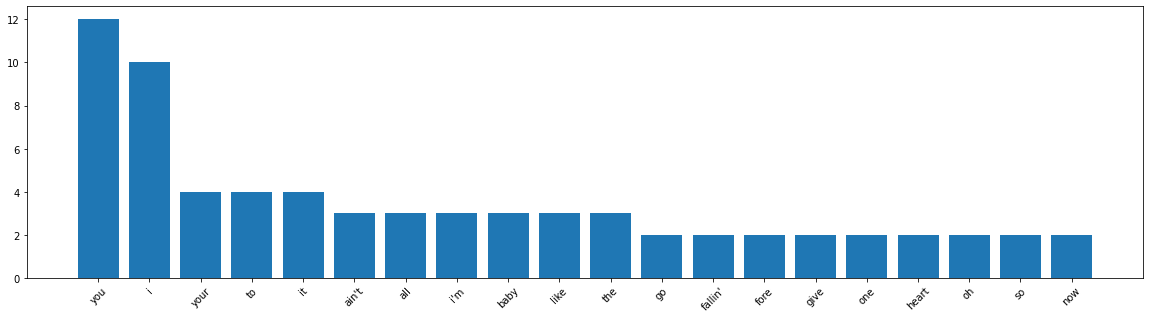

In [56]:
frequency_viz(fake6, 0)